# City Budget A - Capital Budget Plan #

**Group Members:** Toby Ueno, Deep Patel, Lucia Kisova, Thian Amarasekera

Using Boston's FY24 Capital Budget Plan dataset, we aimed to analyze the breakdown of funding by department and location to answer base project question.

## Preprocessing ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/fy24-capital-budget-plan-recommended.csv")
df.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000
2,Boston Centers for Youth and Families,BCYF North End Community Center,Develop a design for a new North End Community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000
3,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000
4,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000


In [3]:
df["Total_Project_Budget"] = df["Total_Project_Budget"].astype(str)
df["Total_Project_Budget"] = df["Total_Project_Budget"].str.replace(",", "")
df["Total_Project_Budget"] = pd.to_numeric(df["Total_Project_Budget"])

## Department Breakdown Analysis ##

In [4]:
filtered = df[["Department", "Total_Project_Budget"]].copy()

grouped = filtered.groupby("Department").sum()
df_sorted = grouped.sort_values(by="Total_Project_Budget", ascending=False)
df_sorted

,Total_Project_Budget
Department,
Boston Public Schools,1.047254e+09
Public Works Department,9.433213e+08
Property Management Department,3.426200e+08
Parks and Recreation Department,3.318893e+08
Transportation Department,2.949688e+08
Mayor's Office of Housing,2.080000e+08
Boston Centers for Youth and Families,2.034750e+08
Environment Department,1.720322e+08
Boston Public Library,1.542900e+08


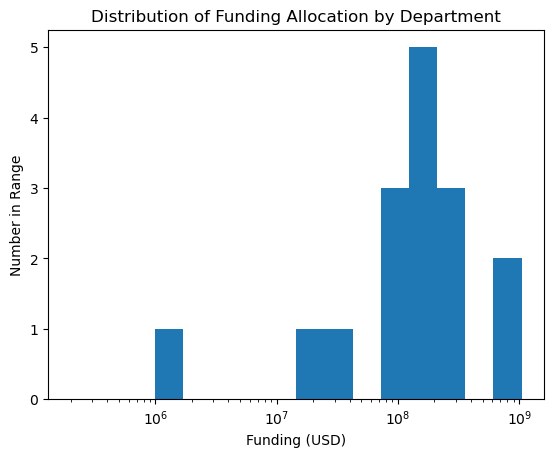

In [5]:
hist, bin_values = np.histogram(df_sorted["Total_Project_Budget"], bins=16)
logbins = np.logspace(np.log10(bin_values[0]), np.log10(bin_values[-1]), len(bin_values))

plt.hist(df_sorted["Total_Project_Budget"], bins=logbins)

plt.xscale("log")
plt.xlabel("Funding (USD)")
plt.ylabel("Number in Range")
plt.title("Distribution of Funding Allocation by Department")

plt.show()

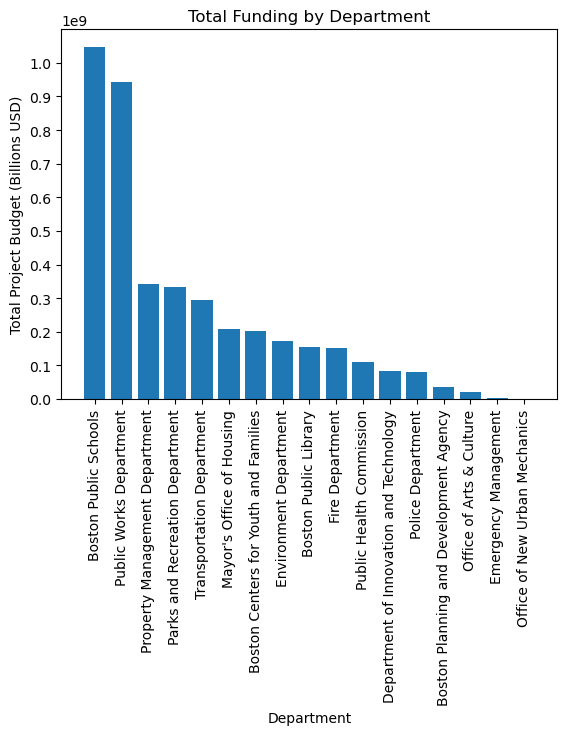

In [6]:
x = df_sorted.index
y = df_sorted["Total_Project_Budget"]

fig, ax = plt.subplots()
ax.bar(x, y, label=x)

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1100000000, step=100000000))
plt.xlabel("Department")
plt.ylabel("Total Project Budget (Billions USD)")
plt.title("Total Funding by Department")

plt.show()

## Location Breakdown Analysis ##

In [8]:
df_location = df[['Neighborhood', 'Total_Project_Budget']].copy()

grouped_location = df_location.groupby('Neighborhood').sum()
location_sorted = grouped_location.sort_values(by='Total_Project_Budget', ascending=False)
location_sorted

,Total_Project_Budget
Neighborhood,
Citywide,1.056967e+09
Charlestown,5.312124e+08
Downtown/Government Center,3.184150e+08
Multiple Neighborhoods,3.078742e+08
Chinatown,2.712722e+08
Dorchester,2.394112e+08
Roxbury,2.373083e+08
South Boston,2.002500e+08
South End,1.814320e+08


In [14]:
highest_spending = location_sorted.nlargest(10, 'Total_Project_Budget')
lowest_spending = location_sorted.nsmallest(10, 'Total_Project_Budget')

print('Highest Spending Locations:')
print(highest_spending)
print()
print('Lowest Spending Locations:')
print(lowest_spending)

Highest Spending Locations:
                            Total_Project_Budget
Neighborhood                                    
Citywide                            1.056967e+09
Charlestown                         5.312124e+08
Downtown/Government Center          3.184150e+08
Multiple Neighborhoods              3.078742e+08
Chinatown                           2.712722e+08
Dorchester                          2.394112e+08
Roxbury                             2.373083e+08
South Boston                        2.002500e+08
South End                           1.814320e+08
Harbor Islands                      1.717781e+08

Lowest Spending Locations:
                  Total_Project_Budget
Neighborhood                          
Bay Village                  1525000.0
West End                     5000000.0
Mission Hill                 5242212.0
Hyde Park                    6615000.0
Fenway-Kenmore              12750000.0
Beacon Hill                 34410000.0
West Roxbury                48645000.0
Allst

C:\Users\Lucy\AppData\Local\Temp\ipykernel_16076\1086753046.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=highest_spending.index, rotation=90)
C:\Users\Lucy\AppData\Local\Temp\ipykernel_16076\1086753046.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=lowest_spending.index, rotation=90)


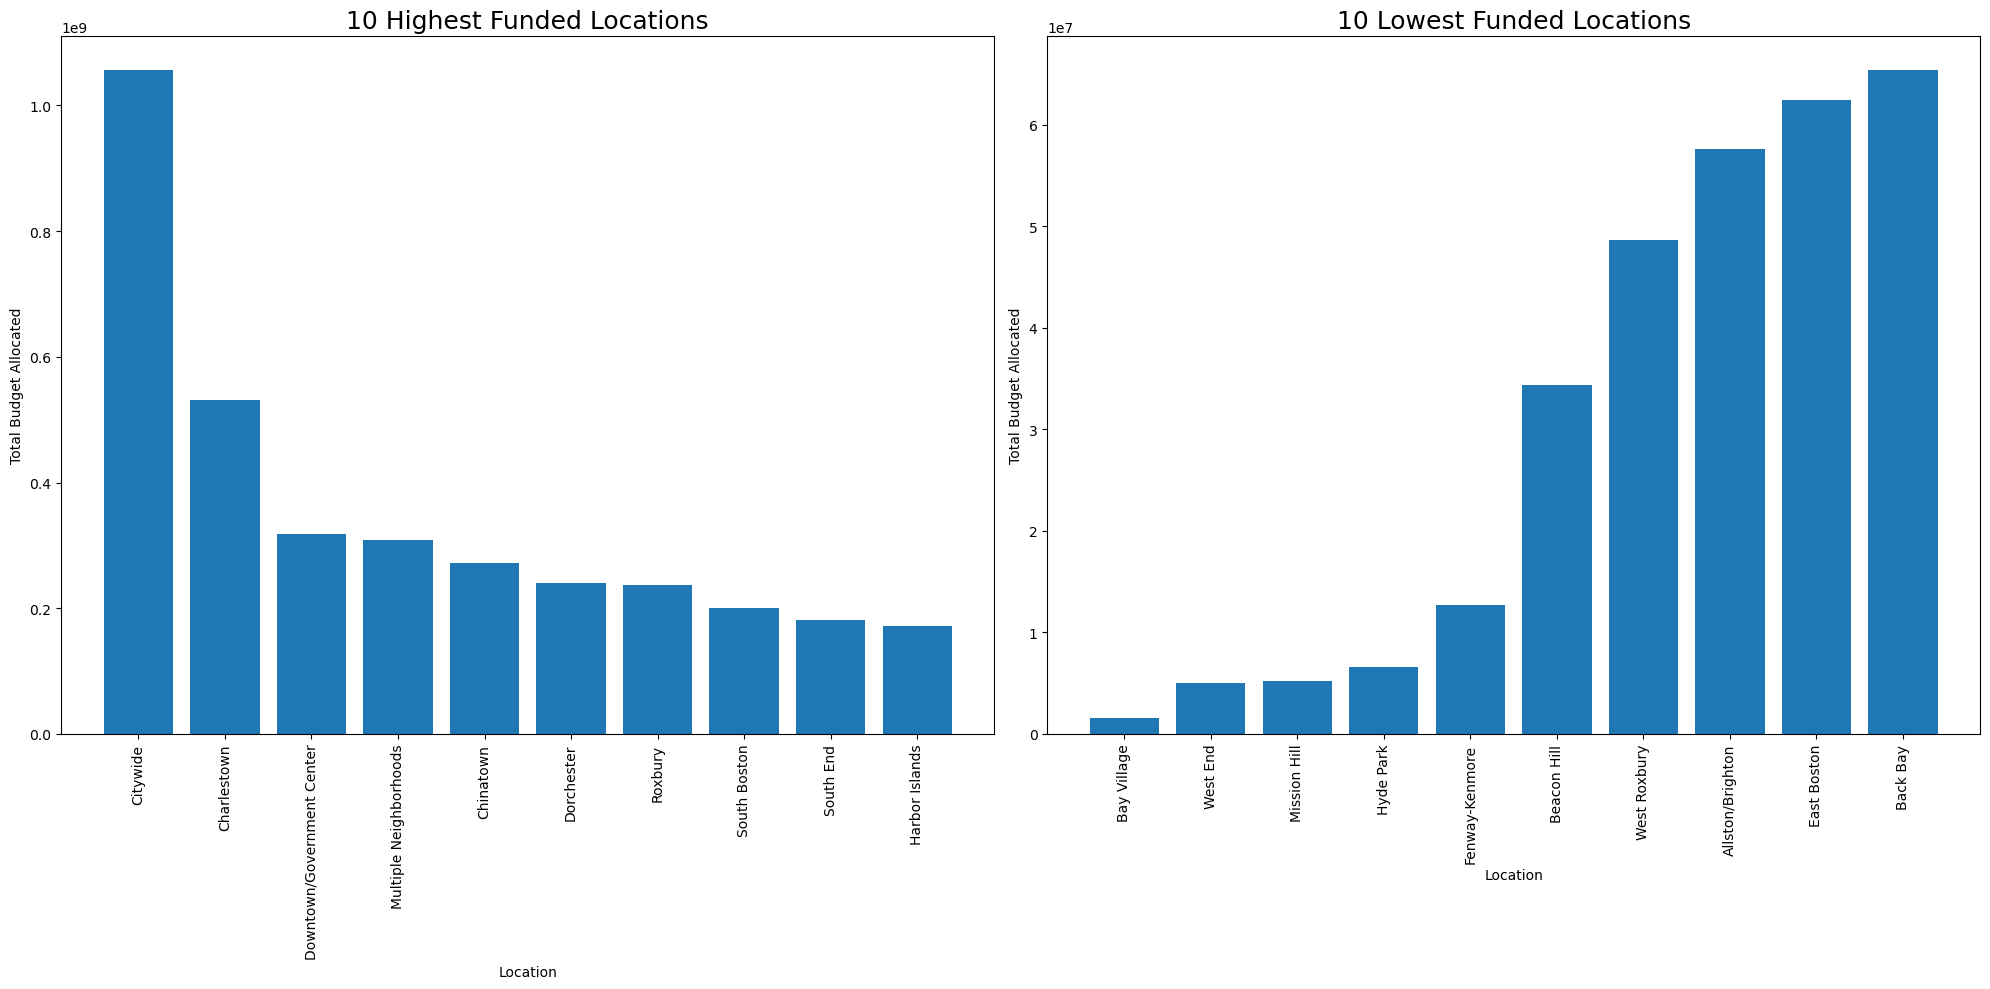

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].bar(highest_spending.index, highest_spending['Total_Project_Budget'])
ax[0].set_xlabel('Location', fontsize=10)
ax[0].set_ylabel('Total Budget Allocated', fontsize=10)
ax[0].set_title('10 Highest Funded Locations', fontsize=18)
ax[0].set_xticklabels(labels=highest_spending.index, rotation=90)

ax[1].bar(lowest_spending.index, lowest_spending['Total_Project_Budget'])
ax[1].set_xlabel('Location', fontsize=10)
ax[1].set_ylabel('Total Budget Allocated', fontsize=10)
ax[1].set_title('10 Lowest Funded Locations', fontsize=18)
ax[1].set_xticklabels(labels=lowest_spending.index, rotation=90)

plt.tight_layout()
plt.show()

In [39]:
location_sorted_copy = location_sorted.copy().drop(['Citywide', 'Multiple Neighborhoods'])
location_sorted_copy['Percentage'] = location_sorted_copy['Total_Project_Budget']
location_sorted_copy['Percentage'] = location_sorted_copy['Percentage'].apply(lambda x: (x / location_sorted_copy['Total_Project_Budget'].sum() * 100))
location_sorted_copy

,Total_Project_Budget,Percentage
Neighborhood,,
Charlestown,531212390.0,18.848537
Downtown/Government Center,318415000.0,11.298036
Chinatown,271272172.0,9.625309
Dorchester,239411239.0,8.494816
Roxbury,237308325.0,8.420200
South Boston,200249965.0,7.105291
South End,181432034.0,6.437591
Harbor Islands,171778144.0,6.095051
Roslindale,102470000.0,3.635852


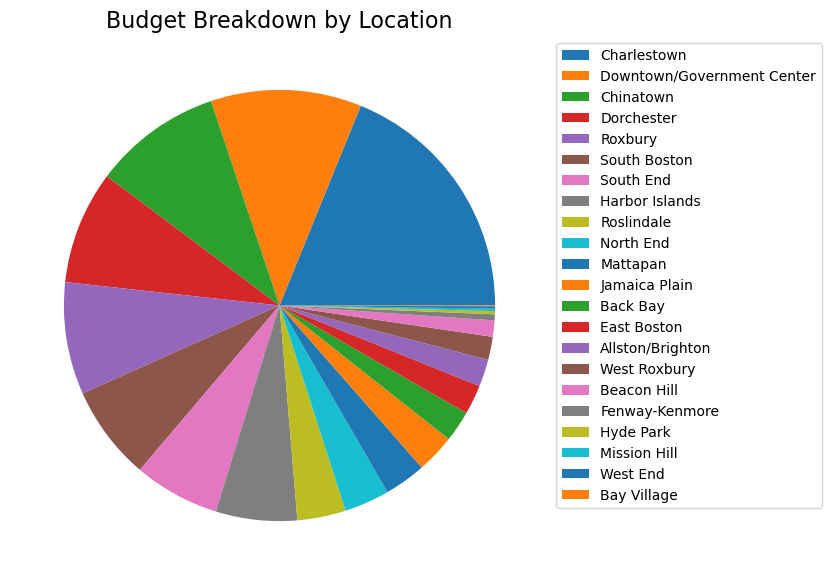

In [64]:
plt.figure(figsize=(15, 7))
plt.pie(location_sorted_copy['Percentage'])
plt.legend(location_sorted_copy.index, bbox_to_anchor=(1, 1))
plt.title('Budget Breakdown by Location', fontsize=16)
plt.show()